#Fertilizer Recommendation System

In [ ]:
#Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [ ]:
data=pd.read_csv('/content/fertilizer_recommendation.csv')
df=pd.DataFrame(data)
df

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea
...,...,...,...,...,...,...,...,...,...
547,12,95,42,Sandy,orange,11,14,5,10-10-10
548,12,95,42,Sandy,orange,11,14,5,10-10-10
549,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10
550,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10


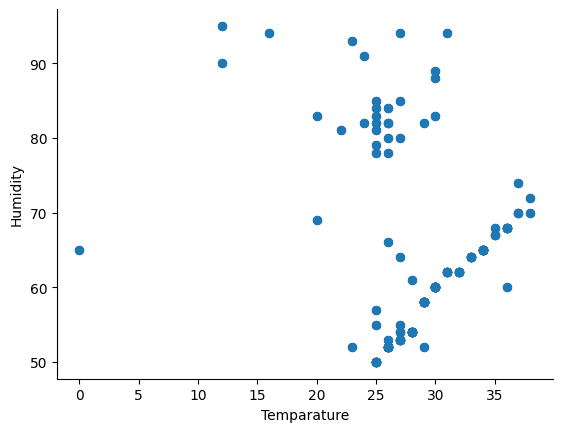

In [ ]:
# @title Temparature vs Humidity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temparature', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-47-036acb7da0c1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Nitrogen', y='Soil_Type', inner='box', palette='Dark2')


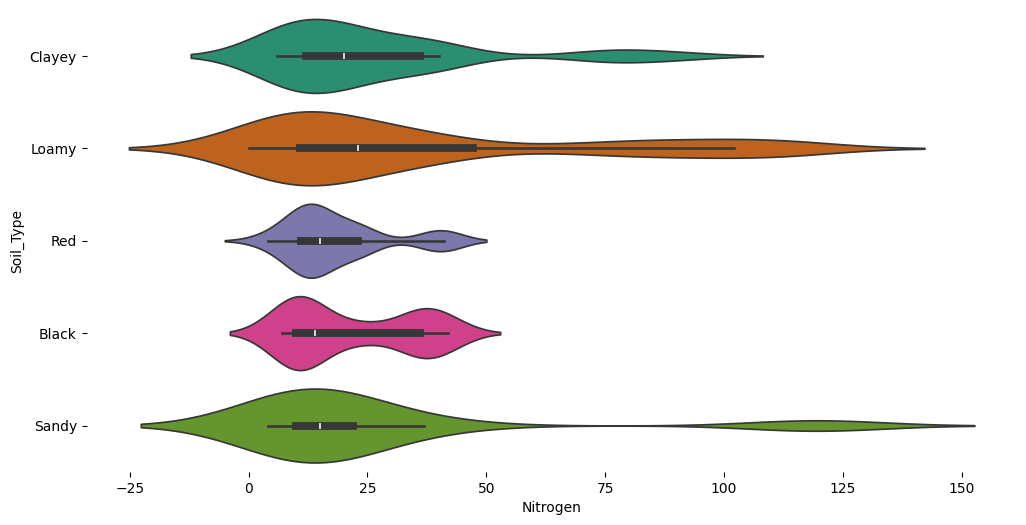

In [ ]:
# @title Soil_Type vs Nitrogen

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Soil_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Nitrogen', y='Soil_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

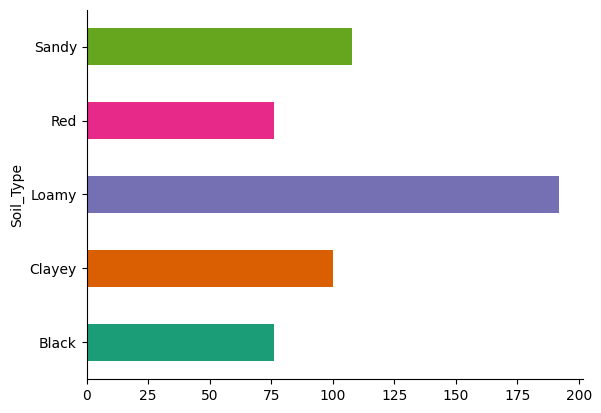

In [ ]:
# @title Soil_Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Soil_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Cosine Similarity

In [ ]:
features=['Temparature','Humidity','Moisture','Nitrogen','Potassium','Phosphorous']
X_features=df[features]

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_features)

In [ ]:
def fertilizer_recommendation(new_data_point,X_scaled,df):
  new_data_point_scaled=scaler.transform([new_data_point])
  cosine_similarities=cosine_similarity(new_data_point_scaled,X_scaled)
  similarity_scores=cosine_similarities[0]
  top_indices=similarity_scores.argsort()[::-1][:5]
  recommended_fertilizers=df.loc[top_indices,'Fertilizer'].tolist()
  return recommended_fertilizers

In [ ]:
#Example usage:
new_data=[20,81,32,66,35,50]
recommended_fertilizers=fertilizer_recommendation(new_data,X_scaled,df)
print(f"Recommended Fertilizers: {recommended_fertilizers}")

Recommended Fertilizers: ['Urea', 'Urea', 'Urea', 'Urea', 'DAP']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Support Vector Machine (SVM)

In [ ]:
df1=df
df1.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [ ]:
#Assingning features and target
X=df1[['Temparature','Moisture','Humidity','Soil_Type','Crop_Type','Nitrogen','Potassium','Phosphorous']]
y=df1['Fertilizer']

In [ ]:
#Identifying categorical and numerical columns
categorical_features=X.select_dtypes(include=['object']).columns
numerical_features=X.select_dtypes(include=['float64','int64']).columns

In [ ]:
#Preprocessing pipeline
preprocessor=ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_features),  #Scaling numerical features
        ('cat', OneHotEncoder(), categorical_features)   #One-hot encoding categorical features
    ])

In [ ]:
#SVM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0, gamma='scale'))  # RBF kernel SVM
])

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [ ]:
#Model Fitting
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Temparature', 'Moisture', 'Humidity', 'Nitrogen', 'Potassium',
       'Phosphorous'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Soil_Type', 'Crop_Type'], dtype='object'))])),
                ('classifier', SVC())])

In [ ]:
#Making predictions
y_pred = pipeline.predict(X_test)

In [ ]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-score: 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


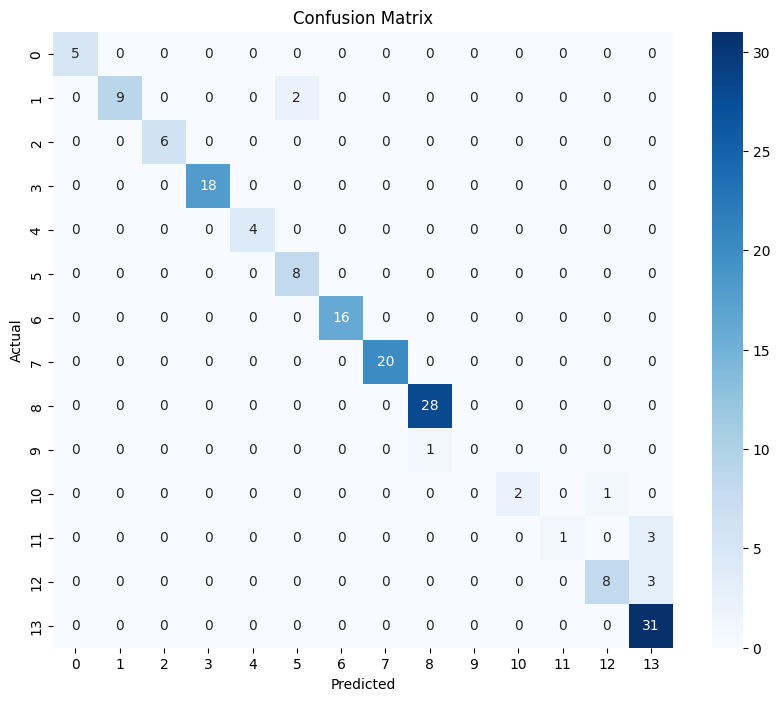

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Recurrent Neural Network

In [ ]:
df2=df

In [ ]:
#Encoding categorical features
df2['Soil_Type'] = df2['Soil_Type'].astype('category').cat.codes
df2['Crop_Type'] = df2['Crop_Type'].astype('category').cat.codes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Fertilizer', axis=1))
y = df['Fertilizer'].astype('category').cat.codes

#Reshaping X for RNN input (samples, timesteps, features)
X_rnn = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [ ]:
#Train=Test Split
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y, test_size=0.2, random_state=42)

In [ ]:
#Model Defining
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(data['Fertilizer'].unique()), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.0644 - loss: 2.7180 - val_accuracy: 0.2247 - val_loss: 2.5572
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2811 - loss: 2.4980 - val_accuracy: 0.2809 - val_loss: 2.4288
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3886 - loss: 2.3123 - val_accuracy: 0.2921 - val_loss: 2.3078
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4077 - loss: 2.1717 - val_accuracy: 0.3146 - val_loss: 2.1859
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4592 - loss: 1.9967 - val_accuracy: 0.3708 - val_loss: 2.0627
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4448 - loss: 1.9342 - val_accuracy: 0.3820 - val_loss: 1.9521
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5210 - loss: 1.7025 - val_accuracy: 0.3820 - val_loss: 1.8391
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4994 - loss: 1.6575 - val_accuracy: 0.4157 - val_loss

In [ ]:
#Evaluatig the model
y_pred = model.predict(X_test).argmax(axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
Accuracy: 0.92
Precision: 0.94
Recall: 0.92
F1-score: 0.92


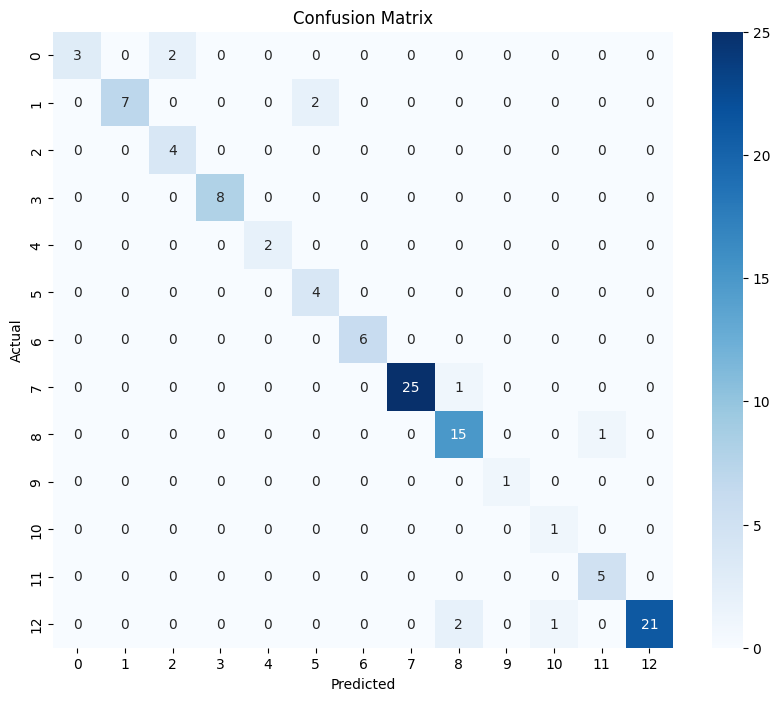

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

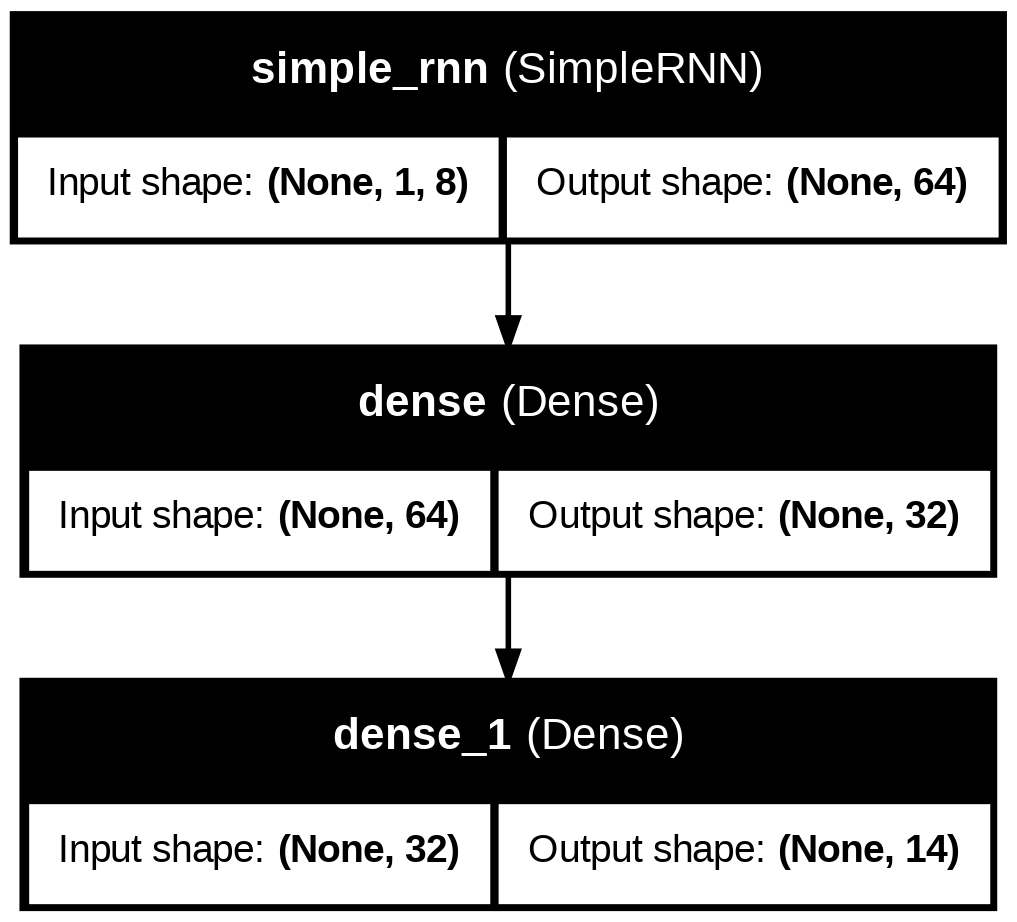

In [ ]:
# prompt: model visualization of RNN

# Import necessary libraries
from tensorflow.keras.utils import plot_model # Use tensorflow.keras.utils instead of keras.utils.vis_utils
import pydot
import graphviz

# Assuming your RNN model is defined as 'model'
plot_model(model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

# Display the model visualization
from IPython.display import Image
Image('rnn_model.png')

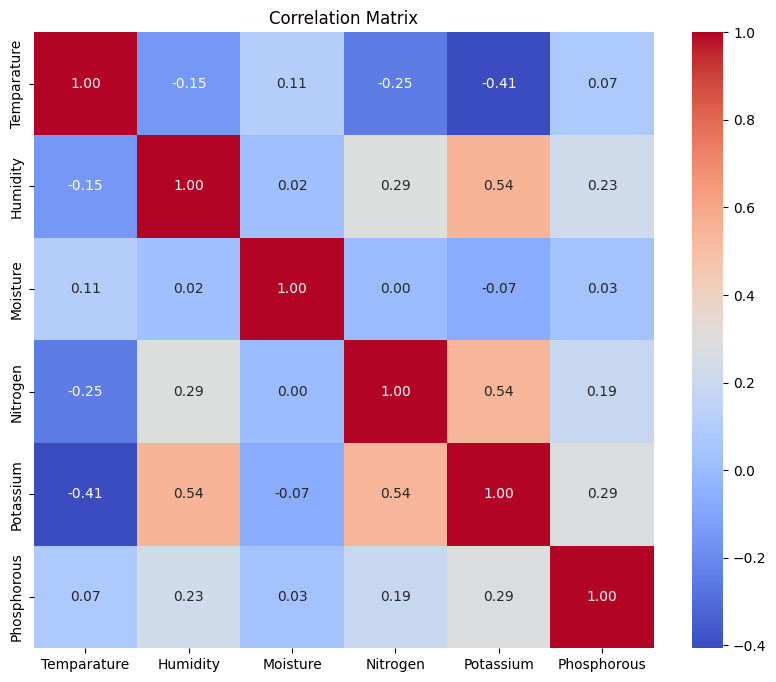

In [ ]:
#Converting 'Fertilizer' column to strings for correlation analysis
df['Fertilizer'] = df['Fertilizer'].astype(str)

#Selecting numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

#Calculating correlation matrix
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

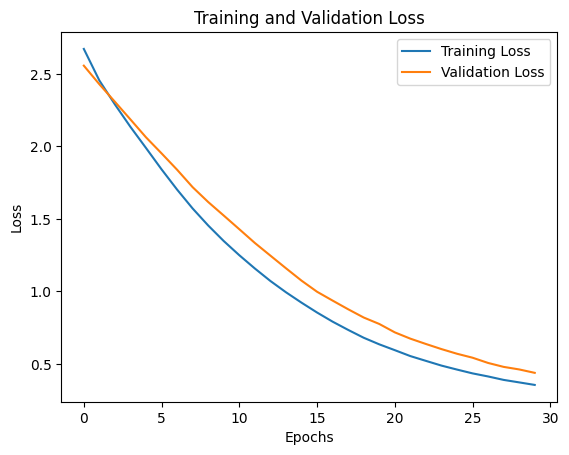

In [ ]:
#Training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

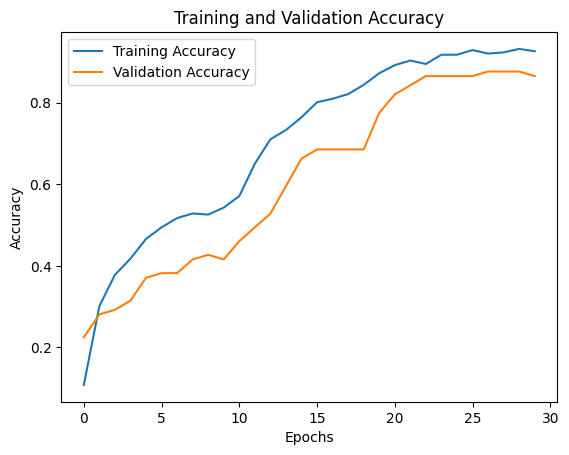

In [ ]:
#Training and testing accuracy for RNN model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#KNN

In [ ]:
X=df[['Temparature','Humidity','Moisture','Soil_Type','Crop_Type','Nitrogen','Potassium','Phosphorous']]
y=df['Fertilizer']

In [ ]:
#Categorical features to numerical using one-hot encoding
categorical_features=['Soil_Type','Crop_Type']
numerical_features=['Temparature','Humidity','Moisture','Nitrogen','Potassium','Phosphorous']

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)],remainder='passthrough')
X_encoded=ct.fit_transform(X)

In [ ]:
#Data spliting
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.2,random_state=42)

In [ ]:
#Model training
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predictions
y_pred=knn_model.predict(X_test)

#Evaluation
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.96
Recall: 0.95
F1-score: 0.94


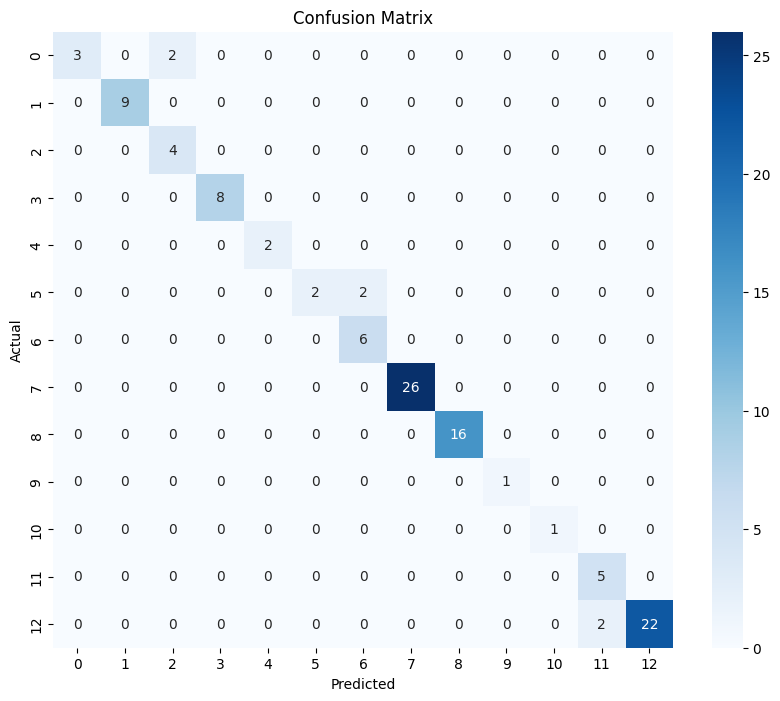

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#new_data=[[28,50,50,'Sandy','Maize',20,30,10]]
#new_data_encoded=ct.transform(new_data)
#predicted_fertilizer=knn_model.predict(new_data_encoded)
#print(f"Recommended Fertilizer:{predicted_fertilizer[0]}")